# Third miniproject
## Note regarding the opencl platform implementation:
*I could run the code on both my iGPU and CPU a couple of weeks ago. I have since switched OS and now the platforms and device ID's are a bit off. The code only runs with arguments 0,0 on my PC; but it should work fine on other systems.* <br>

## Code overview
All the code can be found in the file opencl.py. If the code is run as is in a terminal, it computes the Mandelbrot fractal using platform 0 device 0.
In the bottom of the script a line of code can be uncommented, and the script can then be run in the terminal, in order to run a unittest of the code.

### Kernel code
The kernel code only uses one constant variale, which is `maxiter`, because it should not change during execution. The kernel also saves the adress of the array containing the raveled complex plane, and the adress of the counting variables. These are, respectively, defined as a floating point and an unsigned integer. The code specifies these as global varaibles, whereas the `maxiter` variables is only used locally in the scope of the function.

### Code testing
The code has been tested by unittesting. In order to run this, go the opencl.py file and uncomment the last line (and uncomment the plottig of the fractal). Then run the code in the terminal. The tests, as described by a comment in the class, some properties of the fractal which are trivial to prove mathematically, and as such they should be true when running the code as well.

In [16]:
# the sys and os imports are used to add the current dir to the working dir. The import might/might not work without it
# depending on your python config
import sys
import os

sys.path.insert(1, os.getcwd())

import opencl as oc
import time
import matplotlib.pyplot as plt
import numpy as np

## Test platforms
In the code cell below you can specify a list of platform and device ID's (list of tuples with (platform_id, device_id) e.g. `[(0, 1), (1, 0)]`)

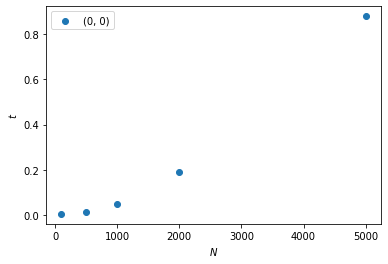

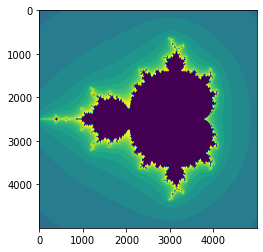

In [17]:
devices = [(0, 0)]
times = []
Ns = [100, 500, 1000, 2000, 5000]
max_iter = 20
res = np.zeros((10, 10))

for dev in devices:
    new_time = []
    for N in Ns:
        t1 = time.time()
        res = oc.mandelbrot(N, max_iter, dev[0], dev[1])
        t2 = time.time()
        new_time.append(t2-t1)
    times.append(new_time)

for i, dev in enumerate(devices):
    plt.scatter(Ns, times[i], label=str(dev))

plt.xlabel(r"$N$")
plt.ylabel(r"$t$")
plt.legend()
plt.show()

plt.imshow(res)
plt.show()